# Graphs

In [1]:
import sklearn
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
sns.set(rc={
 'axes.edgecolor': '#888888',
 'axes.facecolor': '#eeeeee',
 'axes.grid': False,
 'axes.labelcolor': '#888888',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'None',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': '#888888',
 'xtick.bottom': True,
 'xtick.color': '#888888',
 'ytick.color': '#888888',
 'ytick.left': True,
 'axes.prop_cycle': plt.cycler(color=['#e17c78', '#ff5148', '#63d863', '#6591c4'])
})
sns.set_context("notebook", rc={"font.size":14,
                                "axes.titlesize":14,
                                "axes.labelsize":14})

### Classification vs regression

In [3]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=300)

In [4]:
from sklearn.datasets import make_blobs, make_regression
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, noise=10)

Text(0, 0.5, 'y')

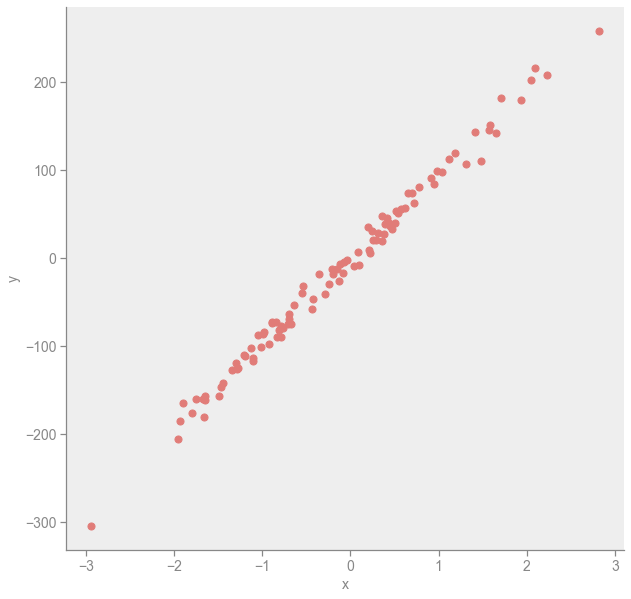

In [5]:
plt.figure(figsize=(10, 10))
cmap = mcolors.ListedColormap(plt.rcParams['axes.prop_cycle'].by_key()['color'])
n = 1
norm = mcolors.BoundaryNorm(np.arange(n+1)-0.5, n)
plt.scatter(x, y, s=50, cmap=cmap, norm=norm)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.xlabel("x")
plt.ylabel("y")

### Conditional distribution

Text(0, 0.5, 'f(x)')

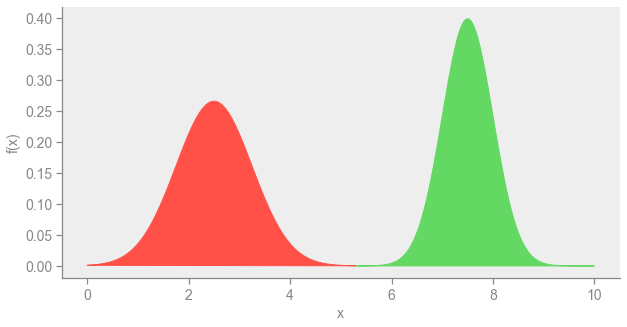

In [6]:
plt.figure(figsize=(10, 5))
x = np.linspace(0,10,1000)
y1 = stats.norm.pdf(x, loc=2.5, scale=0.75) / 2
y2 = stats.norm.pdf(x, loc=7.5, scale=0.5) / 2
#plt.fill(x,y1, c=plt.rcParams["axes.prop_cycle"].by_key()["color"][0])
#plt.fill(x,y2, c=plt.rcParams["axes.prop_cycle"].by_key()["color"][0])
plt.fill(x[:530],y1[:530], c=plt.rcParams["axes.prop_cycle"].by_key()["color"][1])
plt.fill(x[530:],y2[530:], c=plt.rcParams["axes.prop_cycle"].by_key()["color"][2])
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.xlabel("x")
plt.ylabel("f(x)")

### Two distributions

Text(0, 0.5, 'f(x)')

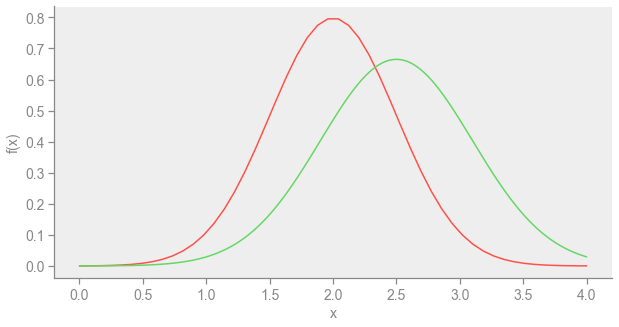

In [7]:
plt.figure(figsize=(10, 5))
x1 = np.linspace(0, 4, 50)
x2 = np.linspace(0, 4, 1000)
y1 = stats.norm.pdf(x1, loc=2.0, scale=0.5)
y2 = stats.norm.pdf(x2, loc=2.5, scale=0.6)
#plt.fill(x,y1, c=plt.rcParams["axes.prop_cycle"].by_key()["color"][0])
#plt.fill(x,y2, c=plt.rcParams["axes.prop_cycle"].by_key()["color"][0])
plt.plot(x1,y1, c=plt.rcParams["axes.prop_cycle"].by_key()["color"][1])
plt.plot(x2,y2, c=plt.rcParams["axes.prop_cycle"].by_key()["color"][2])
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.xlabel("x")
plt.ylabel("f(x)")

### JSD

In [8]:
def JSD(P, Q):
    _P = P / np.linalg.norm(P, ord=1)
    _Q = Q / np.linalg.norm(Q, ord=1)
    _M = 0.5 * (_P + _Q)
    return 0.5 * (stats.entropy(_P, _M) + stats.entropy(_Q, _M))

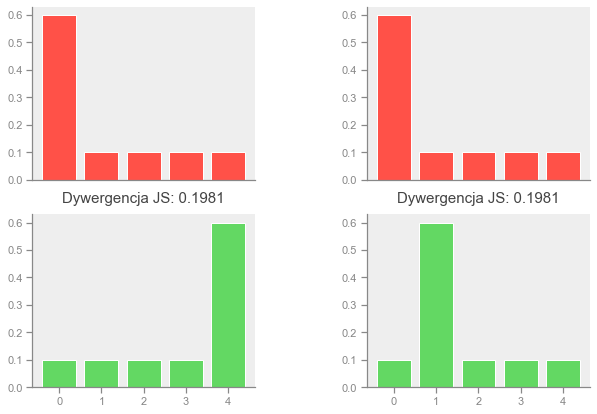

In [9]:
sampP = [1,1,1,1,1,1,2,3,4,5]
sampQ = [1,2,3,4,5,5,5,5,5,5]

P = np.unique(sampP, return_counts=True)[1] / len(sampP)
Q = np.unique(sampQ, return_counts=True)[1] / len(sampQ)

sampQ2 = [1,2,2,2,2,2,2,3,4,5]
Q2 = np.unique(sampQ2, return_counts=True)[1] / len(sampQ2)

fig = plt.figure(figsize=(10,7))
fig.subplots_adjust(wspace=0.5)
plt.subplot(2,2,1)
plt.bar(np.arange(len(P)), P, color=plt.rcParams["axes.prop_cycle"].by_key()["color"][1])
plt.xticks([], [])
plt.subplot(2,2,3)
plt.bar(np.arange(len(Q)), Q, color=plt.rcParams["axes.prop_cycle"].by_key()["color"][2])
plt.title("Dywergencja JS: {:.4}".format(JSD(P, Q)), fontsize=15, pad=12, color="#444444")
plt.subplot(2,2,2)
plt.bar(np.arange(len(P)), P, color=plt.rcParams["axes.prop_cycle"].by_key()["color"][1])
plt.xticks([], [])
plt.subplot(2,2,4)
plt.bar(np.arange(len(Q2)), Q2, color=plt.rcParams["axes.prop_cycle"].by_key()["color"][2])
plt.title("Dywergencja JS: {:.4}".format(JSD(P, Q2)), fontsize=15, pad=12, color="#444444")
plt.show()

### Wasserstein

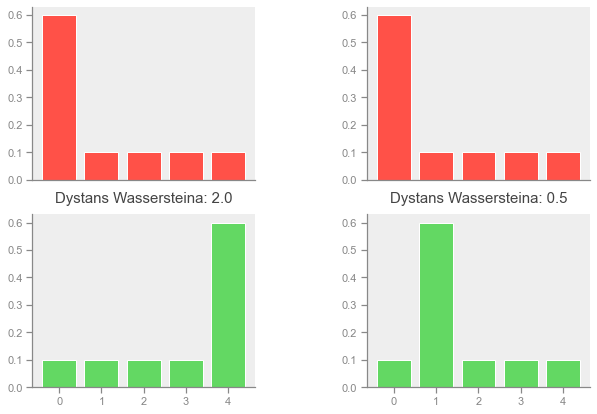

In [10]:
sampP = [1,1,1,1,1,1,2,3,4,5]
sampQ = [1,2,3,4,5,5,5,5,5,5]

P = np.unique(sampP, return_counts=True)[1] / len(sampP)
Q = np.unique(sampQ, return_counts=True)[1] / len(sampQ)

sampQ2 = [1,2,2,2,2,2,2,3,4,5]
Q2 = np.unique(sampQ2, return_counts=True)[1] / len(sampQ2)

fig = plt.figure(figsize=(10,7))
fig.subplots_adjust(wspace=0.5)
plt.subplot(2,2,1)
plt.bar(np.arange(len(P)), P, color=plt.rcParams["axes.prop_cycle"].by_key()["color"][1])
plt.xticks([], [])
plt.subplot(2,2,3)
plt.bar(np.arange(len(Q)), Q, color=plt.rcParams["axes.prop_cycle"].by_key()["color"][2])
plt.title("Dystans Wassersteina: {:.4}".format(stats.wasserstein_distance(sampP, sampQ)), fontsize=15, pad=12, color="#444444")
plt.subplot(2,2,2)
plt.bar(np.arange(len(P)), P, color=plt.rcParams["axes.prop_cycle"].by_key()["color"][1])
plt.xticks([], [])
plt.subplot(2,2,4)
plt.bar(np.arange(len(Q2)), Q2, color=plt.rcParams["axes.prop_cycle"].by_key()["color"][2])
plt.title("Dystans Wassersteina: {:.4}".format(stats.wasserstein_distance(sampP, sampQ2)), fontsize=15, pad=12, color="#444444")
plt.show()